In [1]:
import pickle
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
MGDLpath = 'results/*.pickle'
# path = 'results/BEST/*.pickle'

picklefile = []
for file in glob.glob(MGDLpath):  
    picklefile.append(file)
    # print(file)
print(len(picklefile))
k=5
picklefile =sorted(picklefile, key=lambda x: float(x.split('_')[k][len("learningrate"):]), reverse=False)

MGDL_learning_rate = []
MGDL_lambda = []
MGDL_beta = []
MGDL_train_psnrs = []
for file in picklefile:
    # print(file)
    with open(file, 'rb') as f:
        [SaveHistory, opt] = pickle.load(f)
    MGDL_learning_rate.append(opt.lr_params)
    MGDL_lambda.append(opt.lambd)
    MGDL_beta.append(opt.beta)
    MGDL_train_psnrs.append(SaveHistory['grade'+str(opt.grade)]['psnrs'][-1])

print('\n\n')

70





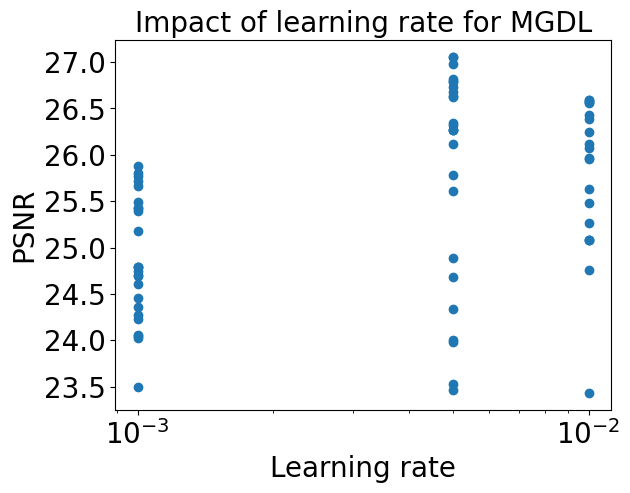

In [3]:
import numpy as np
import matplotlib.ticker as ticker

plt.scatter(MGDL_learning_rate, MGDL_train_psnrs)


plt.xscale('log')


# plt.legend(fontsize=15)             
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Learning rate', fontsize=20)
plt.ylabel('PSNR', fontsize=20)
plt.title('Impact of learning rate for MGDL', fontsize=20)


plt.show()

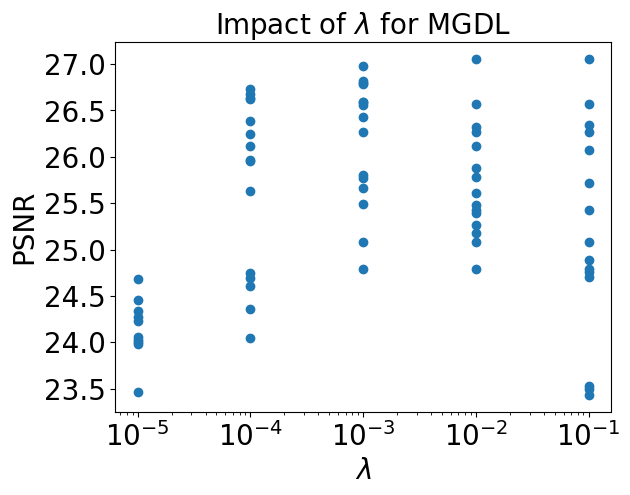

In [4]:
import numpy as np
import matplotlib.ticker as ticker

plt.scatter(MGDL_lambda, MGDL_train_psnrs)


plt.xscale('log')


# plt.legend(fontsize=15)             
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('PSNR', fontsize=20)
plt.title('Impact of $\lambda$ for MGDL', fontsize=20)


plt.show()

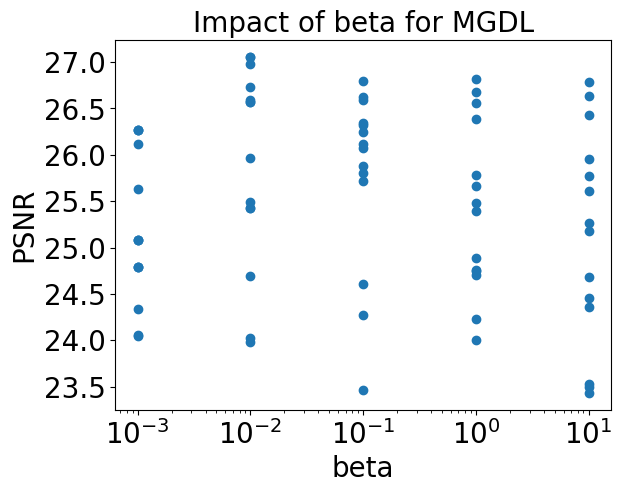

In [5]:
import numpy as np
import matplotlib.ticker as ticker

plt.scatter(MGDL_beta, MGDL_train_psnrs)


plt.xscale('log')


# plt.legend(fontsize=15)             
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('beta', fontsize=20)
plt.ylabel('PSNR', fontsize=20)
plt.title('Impact of beta for MGDL', fontsize=20)


plt.show()

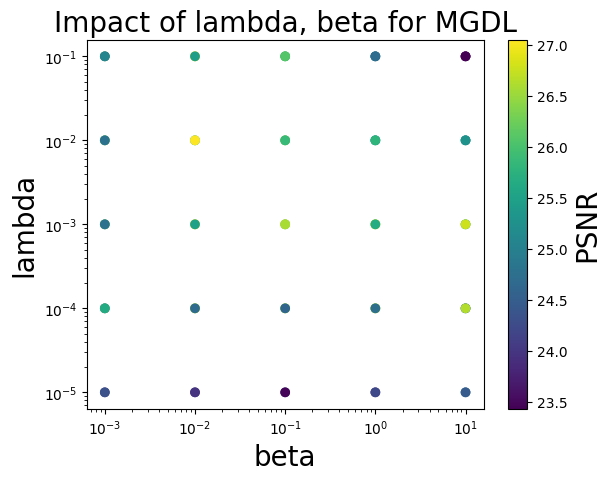

In [6]:
plt.scatter(MGDL_beta, MGDL_lambda, c=MGDL_train_psnrs, cmap='viridis')
plt.xlabel('beta', fontsize=20)
plt.ylabel('lambda', fontsize=20)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(label='PSNR')
cbar.ax.yaxis.label.set_size(20)
plt.title('Impact of lambda, beta for MGDL', fontsize=20)
plt.show()

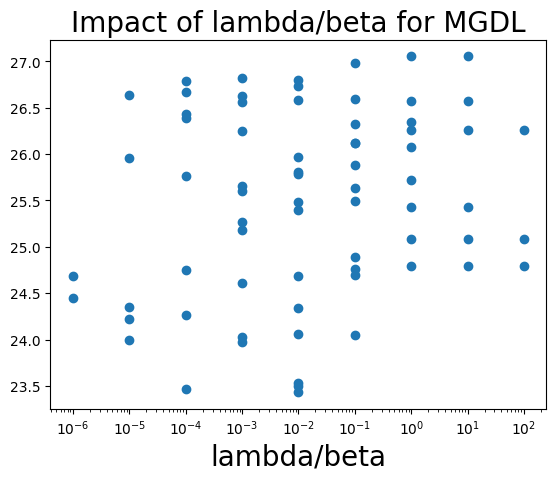

In [7]:
plt.scatter(np.array(MGDL_lambda)/np.array(MGDL_beta), MGDL_train_psnrs)
plt.xlabel('lambda/beta', fontsize=20)
plt.xscale('log')

plt.title('Impact of lambda/beta for MGDL', fontsize=20)
plt.show()